In [1]:
import os,sys
import pandas as pd


In [2]:
sys.path.append("../")


In [3]:
from scripts.data_loader import load_data
# Headline length
df =load_data("../data/raw_analyst_ratings.csv")
df =df.head(200)
df['headline_lengeth'] = df['headline'].str.len()

df.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_lengeth
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87


In [16]:
# Calculating the number of headlines published by each publisher
aggregate1=df.groupby(['publisher'])['url'].count()
aggregate1.head()




publisher
Benzinga Insights      2
Benzinga Newdesk       2
Benzinga Newsdesk     79
Benzinga  Newsdesk     1
Benzinga_Newsdesk      5
Name: url, dtype: int64

In [5]:

from scripts.data_analyzer import analyze_sentiment

# Apply the sentiment analysis from the based on the headline
# Calling analyze_sentiment function in data_analyzer
df["Sentiment"] = df["headline"].head().apply(analyze_sentiment)


df.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_lengeth,Sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,Neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,Neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,Neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,Neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,Neutral


In [6]:
from scripts.data_analyzer import extract_keywords
from keybert import KeyBERT


kw_model = KeyBERT()

# Apply the keyword extraction analysis from from the headline
# applying extract_keywords function defined in data_analyzer over the headline column

df['Keywords'] = df['headline'].apply(lambda x: [kw[0] for kw in kw_model.extract_keywords(x, top_n=3)])

df.head()

c:\Users\bethelhem.teka\OneDrive - Catholic Relief Services\Desktop\KIAM\KAIM-Week1\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Unnamed: 0,headline,url,publisher,date,stock,headline_lengeth,Sentiment,Keywords
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,Neutral,"[stocks, highs, week]"
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,Neutral,"[stocks, highs, week]"
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,Neutral,"[movers, 71, biggest]"
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,Neutral,"[stocks, moving, friday]"
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,Neutral,"[securities, price, target]"


In [6]:
from scripts.data_visualizer import  visualize_bivariate
 
 
# Creating another aggreate dataframe from the first to find the number of publishing by date
df2 = df.groupby(['date'])['url'].count().reset_index()
df2.columns = ['date', 'count']  # Renaming the seocnd column to 'count'
df2.head()


,date,count
0,2018-05-15 00:00:00,3
1,2018-05-16 00:00:00,1
2,2018-05-18 00:00:00,1
3,2018-05-23 00:00:00,1
4,2018-05-24 00:00:00,1


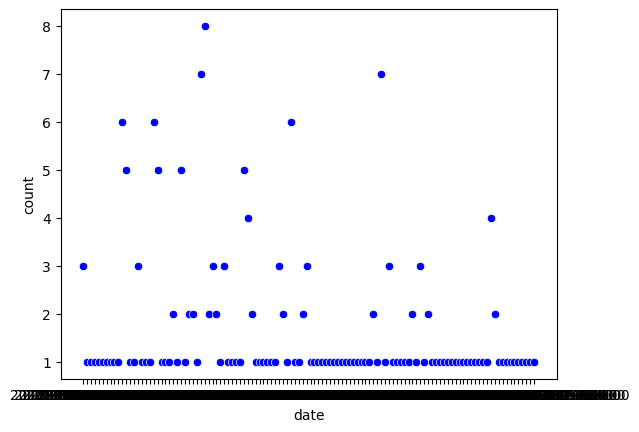

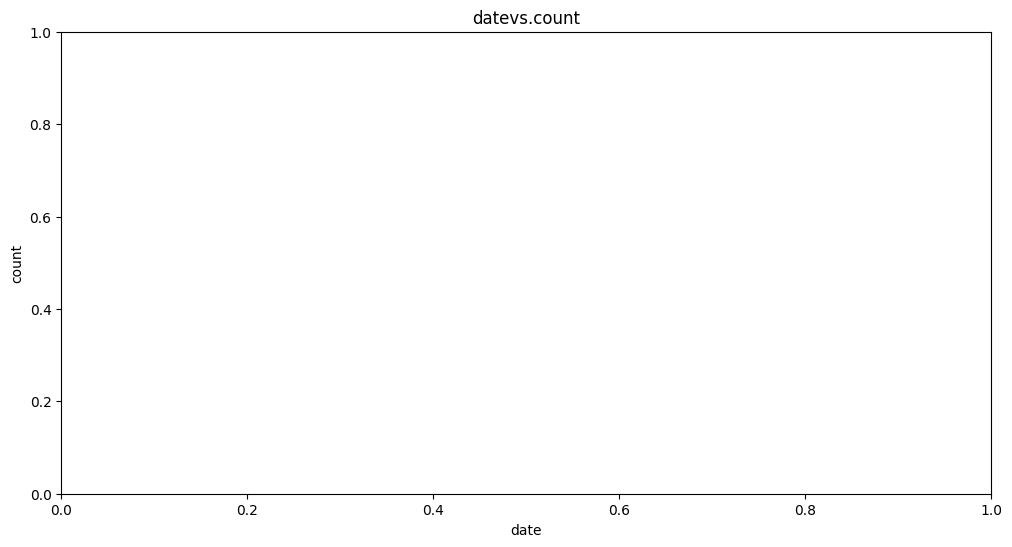

In [17]:
from scripts.data_visualizer import visualize_bivariate
df2 = df2.head(200)

#Visualize the publishing frequency over time
#Calling bivariate function from data_visualizeer

visualize_bivariate('scatterplot',df2,'date','count')




In [23]:

# Assuming publisher name is email address, then counting publishing by organizational domain
# extraction substring after @
df['org_domain']=df['publisher'].str.extract(r'@(.*)')
df.head()

# aggregating count by domain
aggregate2=df.groupby(['org_domain'])['url'].count()
aggregate2.head()

org_domain
benzinga.com    7
Name: url, dtype: int64